**Ejercicio:** Interpolar con 10 puntos generados de la función de Runge $f(x) = \frac{1}{1+25x^2}$ en el intervalo $[-1,1]$ equidistantes. Hacer la gráfica con $10,000$ puntos en el mismo intervalo. Utilizar polyfit para el polinomio interpolador y splines cúbicos.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
from scipy.interpolate import interp1d

In [49]:
#ingresando datos dados por el problema

npoints = 10 #Como tenemos npoints = 10 puntos, entonces debemos generar un polinomio de grado 9
x = np.linspace(-1, 1, npoints, endpoint=True) 
y = (1/(1+25*(x**2))) #función de Runge


Text(0.5, 1.0, 'Diez puntos generados por la función de Runge')

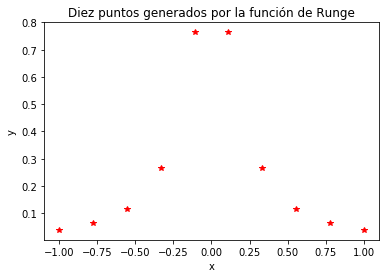

In [50]:
#graficando los 10 puntos generados por la función Runge

plt.plot(x,y, 'r*')
plt.xlabel('x')
plt.ylabel('y')

plt.title('Diez puntos generados por la función de Runge')


In [28]:

ngrado = npoints -1 #el grado del polinomio a ajustar--> 9, porque son 10 los puntos observados
coeficientes = np.polyfit(x,y,ngrado) #llamado a la función polyfit


In [29]:

np.set_printoptions(precision = 2) #sólo dos decimales que se muestren
pprint.pprint(coeficientes)

array([ 1.51e-13,  2.16e+01, -2.90e-13, -4.49e+01,  1.66e-13,  3.07e+01,
       -2.58e-14, -8.26e+00,  0.00e+00,  8.62e-01])




Entonces nuestro polinomio es: $$p_{10 points}(x) = (1.51e^{-13})x^9 + 21.6x^8 - (2.90e^{-13})x^7 - 44.9x^6 + (1.66e^{-13})x^5- 30.7x^4 - (2.58e^{-14})x^3 - 8.26x^2 + 0x^1 + 0.862$$


In [51]:
pw_spline = interp1d(x, y, kind = 'cubic') #spline piecewise 


In [52]:
neval = 10000
xeval = np.linspace(min(x),max(x), neval)
yeval = pw_spline(xeval)
print('xeval.shape:', xeval.shape[0])
print('yeval.shape:', yeval.shape[0])


xeval.shape: 10000
yeval.shape: 10000


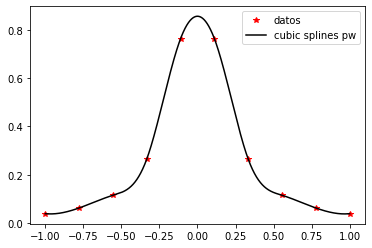

In [53]:
plt.plot(x, y, 'r*',xeval, yeval, 'k-')
plt.legend(['datos','cubic splines pw'], loc='best')

In [42]:
pw_spline(.5)


array(0.13)